In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

Text(0.5, 1.0, 'Pass vs. Fail by Year')

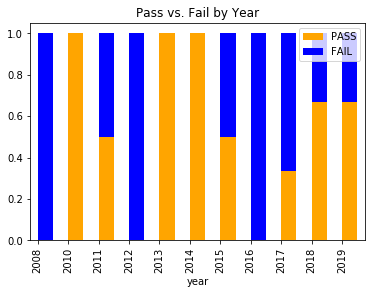

In [13]:
marvel_csv = pd.read_csv("Marvel_Bechdel - Marvel.csv")
marvel_csv.columns = ['film_name', 'binary', 'dom_gross', 'int_gross', 'budget','year']
marvel_pass = marvel_csv.loc[marvel_csv['binary'] == "PASS"].groupby('year').film_name.nunique()
marvel_fail = marvel_csv.loc[marvel_csv['binary'] == "FAIL"].groupby('year').film_name.nunique()
count_by_year = pd.concat([marvel_pass, marvel_fail], axis = 1, sort = False)
count_by_year = count_by_year.fillna(value = 0)
count_by_year.columns = ['pass','fail']
count_by_year = count_by_year.assign(PASS = lambda x : x['pass']/(x['pass']+x['fail']))
count_by_year = count_by_year.assign(FAIL = lambda x : x['fail']/(x['pass']+x['fail']))
count_by_year = count_by_year.drop(columns = ['pass','fail'])
count_by_year[['PASS', 'FAIL']].plot(kind = 'bar', stacked = True, position = 0, color = ('orange', 'blue'))
plt.title('Pass vs. Fail by Year')

In [29]:
count_by_year["PASS"].mean()
count_by_year[count_by_year.index < 2017].PASS.mean()
count_by_year[count_by_year.index >= 2017].PASS.mean()

0.5555555555555555

Text(0.5, 1.0, 'Return Over Time')

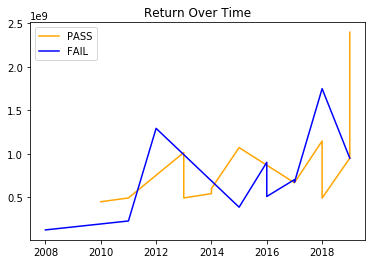

In [15]:
marvel_csv = marvel_csv.assign(RETURN = lambda x: x.int_gross + x.dom_gross - x.budget)
marvel_csv
marvel_pass_return = marvel_csv.loc[marvel_csv['binary'] == "PASS"]
marvel_fail_return = marvel_csv.loc[marvel_csv['binary'] == "FAIL"]
marvel_csv.groupby('year')
plt.plot(marvel_pass_return.year, marvel_pass_return.RETURN, color = "orange", label = "PASS")
plt.plot(marvel_fail_return.year, marvel_fail_return.RETURN, color = 'blue', label = "FAIL")
plt.legend()
plt.title("Return Over Time")

Text(0.5, 1.0, 'Return Trend Over Time')

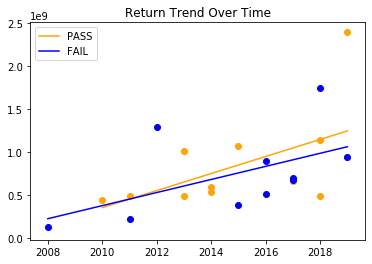

In [45]:
pass_x = marvel_pass_return.year.values.reshape(-1, 1)  # values converts it into a numpy array
pass_y = marvel_pass_return.RETURN.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
fail_x = marvel_fail_return.year.values.reshape(-1, 1)
fail_y = marvel_fail_return.RETURN.values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(pass_x, pass_y)  # perform linear regression
pass_y_pred = linear_regressor.predict(pass_x)  # make predictions
linear_regressor.fit(fail_x, fail_y)
fail_y_pred = linear_regressor.predict(fail_x)
plt.scatter(pass_x, pass_y, color = "orange")
plt.scatter(fail_x, fail_y, color = "blue")
plt.plot(pass_x, pass_y_pred, color='orange', label = "PASS")
plt.plot(fail_x, fail_y_pred, color="blue", label = "FAIL")
plt.legend()
plt.title("Return Trend Over Time")

In [47]:
marvel_pass_return["RETURN"].mean()
marvel_fail_return["RETURN"].mean()
1.4 * (10**10)

14000000000.0

Text(0.5, 1.0, 'Return by Year')

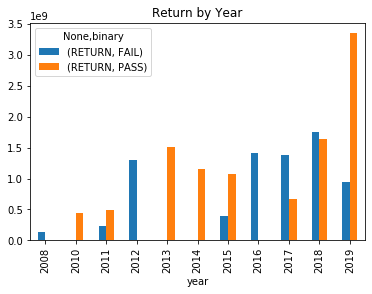

In [20]:
marvel_csv.groupby(['year', 'binary']).RETURN.sum()
df = pd.DataFrame(marvel_csv.groupby(['year', 'binary']).RETURN.sum())
df2 = df.unstack().fillna(value = 0)
df2.plot(kind = 'bar')
plt.title("Return by Year")

Text(0.5, 1.0, 'Budget Over Time')

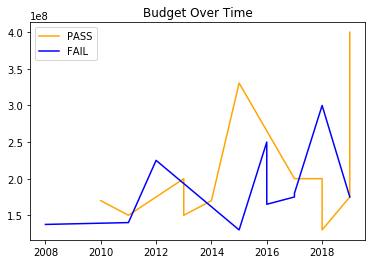

In [22]:
marvel_pass = marvel_csv.loc[marvel_csv['binary'] == "PASS"]
marvel_fail = marvel_csv.loc[marvel_csv['binary'] == "FAIL"]
plt.plot(marvel_pass.year, marvel_pass.budget, color = "orange", label = "PASS")
plt.plot(marvel_fail.year, marvel_fail.budget, color = "blue", label = "FAIL")
plt.legend()
plt.title("Budget Over Time")

Text(0.5, 1.0, 'Budget Trend Over Time')

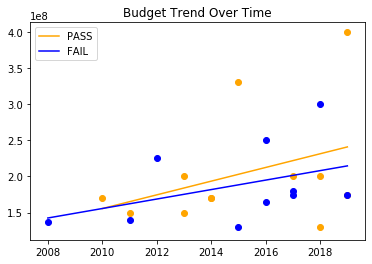

In [46]:
pass_x = marvel_pass.year.values.reshape(-1, 1)  # values converts it into a numpy array
pass_y = marvel_pass.budget.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
fail_x = marvel_fail.year.values.reshape(-1, 1)
fail_y = marvel_fail.budget.values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(pass_x, pass_y)  # perform linear regression
pass_y_pred = linear_regressor.predict(pass_x)  # make predictions
linear_regressor.fit(fail_x, fail_y)
fail_y_pred = linear_regressor.predict(fail_x)
plt.scatter(pass_x, pass_y, color = "orange")
plt.scatter(fail_x, fail_y, color = "blue")
plt.plot(pass_x, pass_y_pred, color='orange', label = "PASS")
plt.plot(fail_x, fail_y_pred, color="blue", label = "FAIL")
plt.legend()
plt.title("Budget Trend Over Time")

In [25]:
print(marvel_pass["budget"].mean())
print(marvel_fail["budget"].mean())

203800000.0
187750000.0


Text(0.5, 1.0, 'Budget by Year')

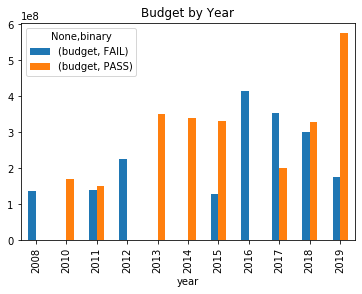

In [21]:
marvel_csv.groupby(['year', 'binary']).budget.sum()
df = pd.DataFrame(marvel_csv.groupby(['year', 'binary']).budget.sum())
df2 = df.unstack().fillna(value = 0)
df2.plot(kind = 'bar')
plt.title("Budget by Year")

In [6]:
#International vs. Domestic Over Time
marvel_csv.groupby(['year', 'binary']).int_gross.sum()
marvel_csv.groupby(['year', 'binary']).dom_gross.sum()

year  binary
2008  FAIL       134806913
2010  PASS       312433331
2011  FAIL       176654505
      PASS       206362140
2012  FAIL       623279547
2013  PASS       615354412
2014  PASS       592919070
2015  FAIL       180202163
      PASS       459005868
2016  FAIL       640726269
2017  FAIL       649259429
      PASS       389813101
2018  FAIL       678815482
      PASS       916708306
2019  FAIL       426829839
      PASS      1285202839
Name: dom_gross, dtype: int64